<a href="https://colab.research.google.com/github/mcnica89/manim/blob/main/Coinflip_Game_Sims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
N = 30
S = 100

def sample(target_sequence,N_samples,N_coin_flips=30):
  
  coin_flips = np.random.random_integers(0,1,(N_samples,N_coin_flips))
  
  def first_index(a,b):
    #Find the index of the first appearence of the array b in a
    for ix in range(len(a)-len(b)+1):
      if np.all(a[ix:ix+len(b)] == b):
        return ix+len(b)
    
    return N_coin_flips

  return np.array([first_index(coin_flips[i,:],target_sequence) for i in range(N_samples)])


[5 4 2 2 7 3 2 3 4 3]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  


<Figure size 1008x504 with 0 Axes>

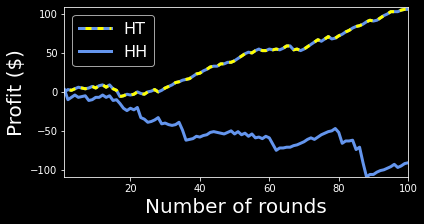

In [94]:
plt.style.use('dark_background')
plt. figure(figsize=(14,7))

HT = np.array([0,1])
HH = np.array([1,1])

myfontsize = 20
fig, ax = plt.subplots()
ax.set_xlabel('Number of rounds',fontsize=myfontsize)
ax.set_ylabel('Profit ($)',fontsize=myfontsize)

N = 100
x = np.arange(1,N+1) #np.arange(0, 2*np.pi, 0.2)
HT_data = np.cumsum(5-sample(HT,N))
HH_data = np.cumsum(5-sample(HH,N))

HTa_line, = plt.plot(x, HT_data, linestyle='-',color='cornflowerblue', lw=3)
HTb_line, = plt.plot(x, HT_data, color='yellow', linestyle=(2, (2, 2)), lw=3)

HH_line, = plt.plot(x, HH_data, linestyle='-',color='cornflowerblue', lw=3)

extreme = max(np.max(np.abs(HT_data)), np.max(np.abs(HH_data)))

plt.axis([1,N, -extreme, extreme])
plt.legend([(HTa_line, HTb_line),(HH_line)], ['HT','HH'],fontsize=16)


#L = 6
#x = np.linspace(0, L)
#ncolors = len(plt.rcParams['axes.prop_cycle'])
#shift = np.linspace(0, L, ncolors, endpoint=False)
#for s in shift:
#    ax.plot(x, np.sin(x + s), 'o-')

#ax.set_title("'dark_background' style sheet")

#plt.show()
r = 0.3
fig.tight_layout()
fig.set_size_inches(20*r, 10*r)
plt.savefig('bets.png', dpi=300)